## Data Structures and Algorithms - Project 1 - Capital Gains Tracker

Refactored 01/21/2026

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AlanBeem/TradingDeque_2/blob/main/main.ipynb)


Alan M H Beem

runtime: about 2 minutes

### Description:

This main .ipynb file contains behavior to demonstrate deque data structure representation of stock purchases. Further, all elements of the Cartesian product of buy and sell strategies are compared in terms of profit / revenue, relative elapsed time, and a ratio of profit / revenue to relative elapsed time.

`TradingBot`: An object for the purpose of tracking balance, profit, and elapsed times, over transactions. Contains a method `string_to_trading_bot()` that interprets a multiline string as a series of buy, sell, and display, commands. Contains settings for buy and sell methods to facilitate combinations of these settings, and accumulates elapsed time buying and selling.

### **If running in Google Colab uncomment the cell below**

In [ ]:
# !pip install git+https://github.com/AlanBeem/TradingDeque_2/tree/main

In [1]:
from package.trading_bot import TradingBot
from package.capital_gains_helper_methods import *
import matplotlib.pyplot as plt
import copy
import jupyter


jupyter

<module 'jupyter' from '/Users/alanbeem/Desktop/anaconda/anaconda3/envs/CSB410_Deep_Learning/lib/python3.12/site-packages/jupyter.py'>

### Expected behavior (StockLedger state, LinkedDeque state) over provided buy sell sequence

Directly interpreting string as StockLedger:
----  Stock Ledger  ----
AAPL: 20.0 (90 shares)   24.0 (20 shares)   
MSFT: 95.0 (14 shares)   60.0 (5 shares)   70.0 (5 shares)   
TSLA: 36.0 (50 shares)   

Total shares (additional display method of StockLedger):
Total shares:
AAPL: 110 shares
MSFT: 24 shares
TSLA: 50 shares

LinkedDeque.display():
LinkedDeque: AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AAPL: $20.0, AA

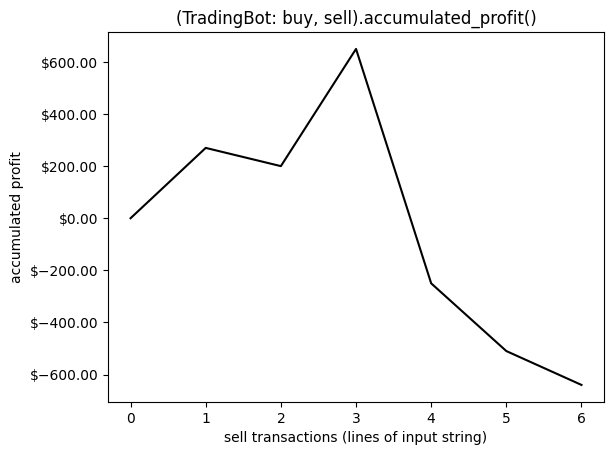

In [2]:
# Buy, sell, display string from Project 1 assignment
buy_sell_str = """Buy 20 shares of AAPL at $45.
Buy 20 shares of AAPL at $75.
Buy 20 shares of MSFT at $95.
Display the ledger
Sell 30 shares of AAPL at $65
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Buy 100 shares of AAPL at $20
Buy 20 shares of AAPL at $24
Buy 200 shares of TSLA at $36
Display the ledger
Sell 10 shares of AAPL at $65
Display the ledger
Sell 150 shares of TSLA at $30
Display the ledger
Buy 5 shares of MSFT at $60
Buy 5 shares of MSFT at $70
Display the ledger
Sell 4 shares of MSFT at $30
Display the ledger
Sell 2 shares of MSFT at $30
Display the ledger"""
print("Directly interpreting string as StockLedger:")
sl_test_1 = interpret_string_as_ledger(buy_sell_str)
sl_test_1.display_ledger()
print()
print("Total shares (additional display method of StockLedger):")
sl_test_1.display_total_shares()
print()
print("LinkedDeque.display():")
sl_test_1[0]._linked_deque.display()
print()
print(
    "Interpreting string as buy, sell, display to TradingBot (has StockLedger):"
)
tb_test_1 = TradingBot(
    100000
)  # default values: buy_setting: 1, sell_setting: 1
tb_test_1.string_to_trading_bot(buy_sell_str, display_bool=True)
tb_test_1.stock_ledger.display_ledger()
print()
fig, ax = plt.subplots()
plt.title(f"({tb_test_1}).accumulated_profit()")
ax.plot(tb_test_1.accumulated_profit(), color="k")
ax.yaxis.set_major_formatter("${x:1.2f}")
plt.ylabel("accumulated profit")
plt.xlabel("sell transactions (lines of input string)")
plt.show()

## More optimal methods for buying and selling

"When the sale price is greater than the ledger entry average, make as much money as possible.", "When the sale price is less than the ledger entry average, lose as little money as possible."; both statements are effected by filling sale quantities using the lowest priced stock purchases available.

Each of these methods uses deque behaviors to implement a scheme, with a goal of increasing profit (or decreasing loss) per dollar of revenue, taking the buy/sell orders as a given.

Where applicable, these methods repeat until all purchased shares are in the deque, or a sale is filled.

In [3]:
# methods testing setup
def buy_methods_testing_additions(tb: TradingBot, shuffle_bool: bool = False):
    prices = list(reversed(range(1, 10)))
    if shuffle_bool:
        SystemRandom().shuffle(prices)
    for price in prices:
        tb.buy("TEST", 1, price)


def sell_methods_testing_removals(tb: TradingBot):
    print("Before any sales:")
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell("TEST", 1, 20)
    print("After selling 1 share:")
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell("TEST", 1, 20)
    print("After selling 2 shares:")
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()
    tb.sell("TEST", 1, 20)
    print("After selling 3 shares:")
    tb.stock_ledger.ledger_entries[0]._linked_deque.display()

### buy method lambda function

In [4]:
bot_buy = lambda x, y, z: [
    tb := TradingBot(x, y, z),
    buy_methods_testing_additions(tb),
    tb.stock_ledger.ledger_entries[0]._linked_deque.display(),
][0]

##### buy: adds StockPurchases to back of deque  O(1)

In [5]:
tb = bot_buy(0, 1, 1)

LinkedDeque: TEST: $9, TEST: $8, TEST: $7, TEST: $6, TEST: $5, TEST: $4, TEST: $3, TEST: $2, TEST: $1


##### buyRandom: increments deque randomly (front to back), then adds a StockPurchase  O(N)

In [6]:
tb = bot_buy(0, 2, 1)

LinkedDeque: TEST: $1, TEST: $9, TEST: $3, TEST: $6, TEST: $8, TEST: $4, TEST: $2, TEST: $5, TEST: $7


##### buyOptimal_1: increments deque such that addition of StockPurchases places shares in ascending order  O(N)

In [7]:
tb = bot_buy(0, 3, 1)

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


##### buyOptimal_2: adds to either the front or the back of the deque, depending whether new purchase cost is less than or equal, or greater than the median  O(N^2)

In [8]:
tb = bot_buy(0, 4, 1)

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


##### buyOptimal_3: adds to either the front of the back of the deque, depending whether new purchase cost is less than or equal, or greater than, back  O(1)

In [9]:
tb = bot_buy(0, 5, 1)

LinkedDeque: TEST: $1, TEST: $2, TEST: $3, TEST: $4, TEST: $5, TEST: $6, TEST: $7, TEST: $8, TEST: $9


### sell method lambda function

In [10]:
sell_bot = lambda x, y, z: [
    tb := TradingBot(x, y, z),
    buy_methods_testing_additions(tb),
    tb.stock_ledger.ledger_entries[0]._linked_deque.display(),
    sell_methods_testing_removals(tb),
][0]

##### sell: removes purchases from front of deque  O(1)

In [11]:
tb = sell_bot(0, 2, 1)  # using buyRandom

LinkedDeque: TEST: $1, TEST: $4, TEST: $5, TEST: $6, TEST: $8, TEST: $9, TEST: $7, TEST: $3, TEST: $2
Before any sales:
LinkedDeque: TEST: $1, TEST: $4, TEST: $5, TEST: $6, TEST: $8, TEST: $9, TEST: $7, TEST: $3, TEST: $2
After selling 1 share:
LinkedDeque: TEST: $4, TEST: $5, TEST: $6, TEST: $8, TEST: $9, TEST: $7, TEST: $3, TEST: $2
After selling 2 shares:
LinkedDeque: TEST: $5, TEST: $6, TEST: $8, TEST: $9, TEST: $7, TEST: $3, TEST: $2
After selling 3 shares:
LinkedDeque: TEST: $6, TEST: $8, TEST: $9, TEST: $7, TEST: $3, TEST: $2


##### sellRandom: increments deque randomly (front to back), then removes a StockPurchase  O(N)

In [12]:
tb = sell_bot(0, 2, 2)  # using buyRandom

LinkedDeque: TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $5, TEST: $2, TEST: $9, TEST: $7, TEST: $1
Before any sales:
LinkedDeque: TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $5, TEST: $2, TEST: $9, TEST: $7, TEST: $1
After selling 1 share:
LinkedDeque: TEST: $3, TEST: $5, TEST: $2, TEST: $9, TEST: $7, TEST: $1, TEST: $6, TEST: $8
After selling 2 shares:
LinkedDeque: TEST: $2, TEST: $9, TEST: $7, TEST: $1, TEST: $6, TEST: $8, TEST: $3
After selling 3 shares:
LinkedDeque: TEST: $6, TEST: $8, TEST: $3, TEST: $2, TEST: $9, TEST: $7


##### sellOptimal_1: increments deque such that front is equal to current lowest cost share, removes from front until cost is different  O(N)

In [13]:
tb = sell_bot(0, 2, 3)  # using buyRandom

LinkedDeque: TEST: $2, TEST: $7, TEST: $9, TEST: $3, TEST: $8, TEST: $6, TEST: $4, TEST: $5, TEST: $1
Before any sales:
LinkedDeque: TEST: $2, TEST: $7, TEST: $9, TEST: $3, TEST: $8, TEST: $6, TEST: $4, TEST: $5, TEST: $1
After selling 1 share:
LinkedDeque: TEST: $2, TEST: $7, TEST: $9, TEST: $3, TEST: $8, TEST: $6, TEST: $4, TEST: $5
After selling 2 shares:
LinkedDeque: TEST: $7, TEST: $9, TEST: $3, TEST: $8, TEST: $6, TEST: $4, TEST: $5
After selling 3 shares:
LinkedDeque: TEST: $8, TEST: $6, TEST: $4, TEST: $5, TEST: $7, TEST: $9


##### sellOptimal_2: increments deque and removes from front any shares with cost less than "median" ((maximum - minimum) / 2 + minimum) O(N)

In [14]:
tb = sell_bot(0, 2, 4)  # using buyRandom

LinkedDeque: TEST: $1, TEST: $9, TEST: $2, TEST: $5, TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $7
Before any sales:
LinkedDeque: TEST: $1, TEST: $9, TEST: $2, TEST: $5, TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $7
After selling 1 share:
LinkedDeque: TEST: $9, TEST: $2, TEST: $5, TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $7
After selling 2 shares:
LinkedDeque: TEST: $5, TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $7, TEST: $9
After selling 3 shares:
LinkedDeque: TEST: $6, TEST: $8, TEST: $4, TEST: $3, TEST: $7, TEST: $9


##### sellOptimal_3: sells from the front or the back according to cost  O(1)

In [15]:
tb = sell_bot(0, 2, 5)  # using buyRandom

LinkedDeque: TEST: $8, TEST: $9, TEST: $2, TEST: $5, TEST: $3, TEST: $6, TEST: $4, TEST: $7, TEST: $1
Before any sales:
LinkedDeque: TEST: $8, TEST: $9, TEST: $2, TEST: $5, TEST: $3, TEST: $6, TEST: $4, TEST: $7, TEST: $1
After selling 1 share:
LinkedDeque: TEST: $8, TEST: $9, TEST: $2, TEST: $5, TEST: $3, TEST: $6, TEST: $4, TEST: $7
After selling 2 shares:
LinkedDeque: TEST: $8, TEST: $9, TEST: $2, TEST: $5, TEST: $3, TEST: $6, TEST: $4
After selling 3 shares:
LinkedDeque: TEST: $8, TEST: $9, TEST: $2, TEST: $5, TEST: $3, TEST: $6


### Testing additional methods using provided string:

In [16]:
bots = []
for sell_i in range(1, 6):
    for buy_i in range(1, 6):
        bots.append(TradingBot(100000, sell_setting=sell_i, buy_setting=buy_i))
        bots[-1].string_to_trading_bot(buy_sell_str)
test_methods_by_sl_str = True
for each_bot_i in bots:
    for each_bot_j in bots:
        if not each_bot_i.stock_ledger.equals(each_bot_j.stock_ledger):
            print("StockLedgers not equal")
            test_methods_by_sl_str = False
if test_methods_by_sl_str:
    print(
        "Using provided string, all combinations of buy and sell methods result"
        " in the same numbers of shares."
    )

Using provided string, all combinations of buy and sell methods result in the same numbers of shares.


### Testing use of generated string:

In [17]:
stock_symbol_list = ["AAPL", "MSFT", "TSLA", "NVDA"]
generated_string, expected_totals = generate_buy_sell_lines_string(
    stock_symbol_list, 100
)
print(f"Expected totals (shares):")
print("".join([symbol.ljust(6).rjust(6) for symbol in stock_symbol_list]))
print("".join([str(total).ljust(6).rjust(6) for total in expected_totals]))
print(f"Number of characters in generated string: {len(generated_string)}\n")
bots_gen = []
for buy_i in range(1, 6):
    for sell_i in range(1, 6):
        bots_gen.append(
            TradingBot(100000, sell_setting=sell_i, buy_setting=buy_i)
        )
        bots_gen[-1].string_to_trading_bot(generated_string)
test_methods_by_sl_str = True
for each_bot_i in bots_gen:
    for each_bot_j in bots_gen:
        if not each_bot_i.stock_ledger.equals(each_bot_j.stock_ledger):
            print("StockLedgers not equal")
            test_methods_by_sl_str = False
if test_methods_by_sl_str:
    print(
        "Using generated string, all combinations of buy and sell methods"
        " result in the same numbers of shares."
    )

Expected totals (shares):
AAPL  MSFT  TSLA  NVDA  
161   150   159   562   
Number of characters in generated string: 3246

Using generated string, all combinations of buy and sell methods result in the same numbers of shares.


### Stock ledgers do vary, while totals are equivalent:

In [18]:
displayed_bool = False
for each_bot_k in bots_gen:
    if displayed_bool:
        break
    for each_bot_L in bots_gen:
        if each_bot_k.profit() != each_bot_L.profit():
            print(each_bot_k)
            each_bot_k.stock_ledger.display_ledger()
            print()
            print(each_bot_L)
            each_bot_L.stock_ledger.display_ledger()
            displayed_bool = True
            break

TradingBot: buy, sell
----  Stock Ledger  ----
TSLA: 293.0 (1 shares)   168.0 (85 shares)   269.0 (24 shares)   304.0 (49 shares)   
MSFT: 1.7 (51 shares)   47.99 (99 shares)   
AAPL: 177.0 (13 shares)   167.0 (52 shares)   267.0 (96 shares)   
NVDA: 134.56 (42 shares)   215.68 (70 shares)   192.75 (9 shares)   131.27 (81 shares)   96.78 (75 shares)   56.43 (52 shares)   195.53 (88 shares)   133.95 (57 shares)   80.59 (86 shares)   250.49 (2 shares)   

TradingBot: buy, sellRandom
----  Stock Ledger  ----
TSLA: 304.0 (41 shares)   315.0 (2 shares)   305.0 (10 shares)   231.0 (11 shares)   289.0 (5 shares)   164.0 (11 shares)   293.0 (31 shares)   168.0 (34 shares)   269.0 (14 shares)   
MSFT: 1.7 (22 shares)   17.75 (4 shares)   54.96 (2 shares)   37.76 (4 shares)   185.41 (3 shares)   31.81 (1 shares)   135.0 (11 shares)   16.41 (1 shares)   3.91 (3 shares)   47.99 (99 shares)   
AAPL: 305.0 (3 shares)   177.0 (1 shares)   268.0 (1 shares)   201.0 (5 shares)   192.0 (1 shares)   300.0

### Accumulated profit for combinations of buy and sell methods:

color is mapped to relative elapsed time for combination of buy and sell methods (this is described numerically for 50 generated strings below)


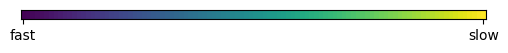

(In legend, at right) TradingBot objects sorted by total elapsed time buying and selling.


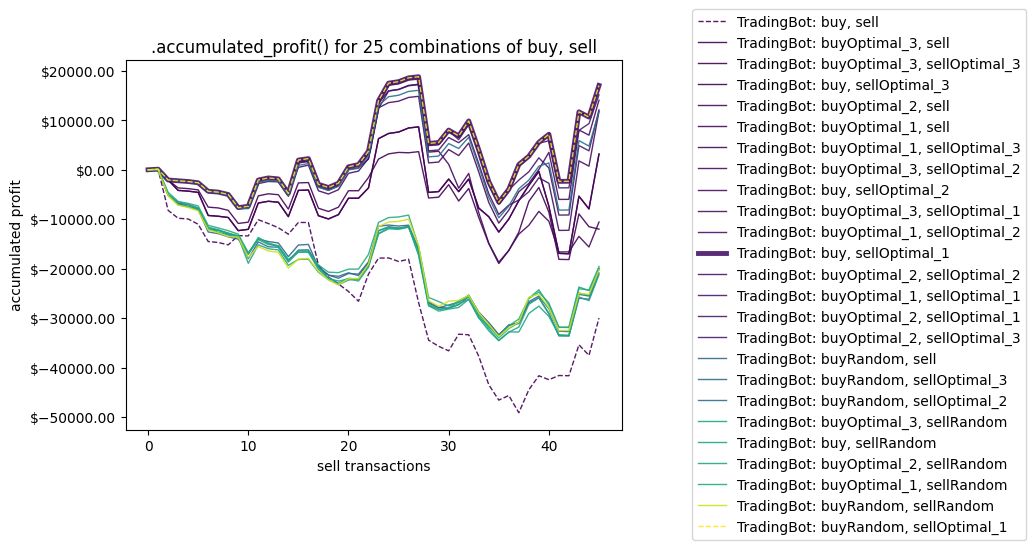

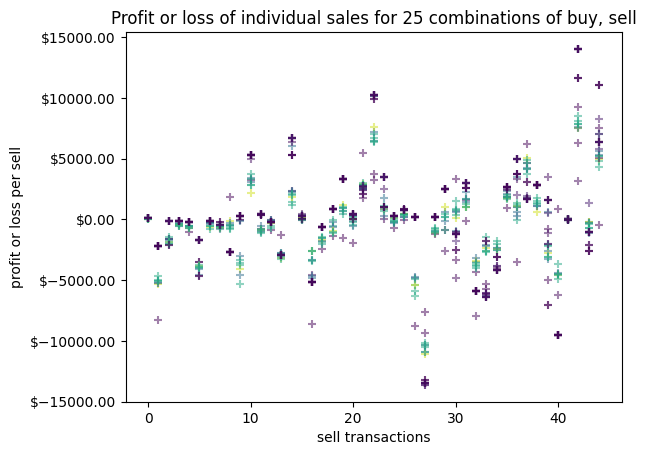

In [19]:
# cmap methods from reading: https://matplotlib.org/stable/users/explain/colors/colormaps.html
cmap = plt.get_cmap("viridis")
print(
    "color is mapped to relative elapsed time for combination of buy and sell"
    " methods (this is described numerically for 50 generated strings below)"
)
fig, ax = plt.subplots()
fig.set_size_inches(6, 2)
ax.imshow(
    (
        [0.01 * c_i for c_i in range(int(1 / 0.01))],
        [0.01 * c_i for c_i in range(int(1 / 0.01))],
    ),
    cmap=cmap,
)
# ax.set_axis_off()
ax.set_yticks([])
ax.set_xticks([0, 99])
ax.set_xticklabels(["fast", "slow"])
plt.show()
#
print(
    "(In legend, at right) TradingBot objects sorted by total elapsed time"
    " buying and selling."
)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter("${x:1.2f}")
plt.title(".accumulated_profit() for 25 combinations of buy, sell")
sorted_bots = copy.deepcopy(bots_gen)
sorted_bots.sort(key=lambda p: p.total_times()[0] + p.total_times()[1])
for each_gen_bot in sorted_bots:
    current_color = cmap(
        (each_gen_bot.total_times()[0] + each_gen_bot.total_times()[1])
        / max(
            [
                (c_bot.total_times()[0] + c_bot.total_times()[1])
                for c_bot in bots_gen
            ]
        )
    )
    if each_gen_bot.buy_setting == 1 and each_gen_bot.sell_setting == 1:
        current_linestyle = "dashed"
    elif each_gen_bot.buy_setting == 2 and each_gen_bot.sell_setting == 3:
        current_linestyle = "dashed"
    else:
        current_linestyle = "solid"
    if each_gen_bot.buy_setting == 1 and each_gen_bot.sell_setting == 3:
        current_linewidth = 3.5
    else:
        current_linewidth = 1.0
    ax.plot(
        each_gen_bot.accumulated_profit(),
        label=str(each_gen_bot),
        alpha=0.9,
        color=current_color,
        linestyle=current_linestyle,
        linewidth=current_linewidth,
    )
plt.ylabel("accumulated profit")
plt.xlabel("sell transactions")
# fig.legend(loc='outside lower center')
ax.legend(
    bbox_to_anchor=(1, 1),  # from matplotlib documentation
    bbox_transform=fig.transFigure,
)
plt.show()
# sellOptimal_1 cannot be improved by addition of a buy strategy
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter("${x:1.2f}")
plt.title("Profit or loss of individual sales for 25 combinations of buy, sell")
for each_gen_bot in bots_gen:
    plt.scatter(
        range(len(each_gen_bot.profit_per_sell)),
        each_gen_bot.profit_per_sell,
        label=str(each_gen_bot),
        alpha=0.5,
        marker="+",
        color=cmap(
            (each_gen_bot.total_times()[0] + each_gen_bot.total_times()[1])
            / max(
                [
                    (c_bot.total_times()[0] + c_bot.total_times()[1])
                    for c_bot in bots_gen
                ]
            )
        ),
    )
plt.ylabel("profit or loss per sell")
plt.xlabel("sell transactions")
plt.show()

## Comparing combinations of strategies for 50 generated strings
a runtime: 1m 37.9s

### lambdas to normalize and print a matrix, title

In [20]:
just_entry = lambda entry: entry.ljust(15).rjust(20)
get_sell_headers = lambda sell_row: "".join(
    [just_entry(each_s) for each_s in ([""] + sell_row)]
)
get_a_row = lambda label, row, div: just_entry(label) + "".join(
    just_entry(f"{row[j] / div:.4f}") for j in range(len(row))
)
get_rows = lambda row_labels, matrix, normalization_value: [
    get_a_row(row_labels[i], matrix[i], normalization_value)
    for i in range(len(matrix))
]
print_matrix_report = lambda title, column_labels, row_labels, matrix, normalization_value=1: \
    print(
    "\n\n".join(
        [
            title,
            get_sell_headers(column_labels),
            *get_rows(row_labels, matrix, normalization_value),
        ]
    )
)

### a lambda is added in this cell to simplify data matrix construction

In [21]:
# comparison setup, for buy x sell (Cartesian product), 50 strings of 100 transactions of [1, 100] shares.
buy_column = [
    "buy",
    "buyRandom",
    "buyOptimal_1",
    "buyOptimal_2",
    "buyOptimal_3",
]
sell_row = [
    "sell",
    "sellRandom",
    "sellOptimal_1",
    "sellOptimal_2",
    "sellOptimal_3",
]

# lambda to make accordant matrices
get_performance_matrix = lambda: [[0 for n in sell_row] for m in buy_column]

num_iterations = 50

to_bot_strings_list = [
    generate_buy_sell_lines_string(stock_symbol_list, 100)[0]
    for s in range(num_iterations)
]

average_performance_matrix = get_performance_matrix()
average_elapsed_time_matrix = get_performance_matrix()
total_elapsed_time_matrix = get_performance_matrix()
total_buy_time_matrix = get_performance_matrix()
total_sell_time_matrix = get_performance_matrix()

for each_string in to_bot_strings_list:
    for i in range(5):
        for j in range(5):
            tb_combs = TradingBot(0, i + 1, j + 1)
            tb_combs.string_to_trading_bot(each_string)
            average_performance_matrix[i][j] += (
                tb_combs.profit() / tb_combs.revenue() / num_iterations
            )
            buy_time, sell_time = tb_combs.total_times()
            average_elapsed_time_matrix[i][j] += buy_time + sell_time
            total_elapsed_time_matrix[i][j] += buy_time + sell_time
            total_buy_time_matrix[i][j] += buy_time
            total_sell_time_matrix[i][j] += sell_time

### Profit / revenue

In [22]:
print_matrix_report(
    "Profit divided by revenue for each combination, averaged over"
    + f" {num_iterations} iterations\n",
    sell_row,
    buy_column,
    average_performance_matrix,
)
print(
    f"\nMaximum average ratio of profit to revenue: {max(map(max, average_performance_matrix)) : .3f}"
)

Profit divided by revenue for each combination, averaged over 50 iterations


                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 0.0001              -0.0099             0.2784              0.2370              0.1340         

     buyRandom           -0.0072             -0.0103             0.2784              0.2402              -0.0018        

     buyOptimal_1        0.2784              -0.0115             0.2784              0.2784              0.2784         

     buyOptimal_2        0.1532              -0.0100             0.2784              0.2641              0.2275         

     buyOptimal_3        0.1135              -0.0090             0.2784              0.2455              0.1135         

Maximum average ratio of profit to revenue:  0.278


##### buyRandom decreases the performance of sellOptimal_3.

### Elapsed time to buy and sell (normalized to (buy, sell))

In [23]:
print_matrix_report(
    "Elapsed time to buy, sell, normalized to (buy, sell)",
    sell_row,
    buy_column,
    total_elapsed_time_matrix,
    total_elapsed_time_matrix[0][0],
)

Elapsed time to buy, sell, normalized to (buy, sell)

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 1.0000              68.8584             5.8007              4.3402              1.0892         

     buyRandom           44.2368             112.0138            106.3231            48.5229             44.9315        

     buyOptimal_1        4.7052              70.9813             9.4801              6.2636              3.7172         

     buyOptimal_2        3.7806              69.9061             9.3251              6.2329              3.3771         

     buyOptimal_3        1.0991              69.1729             5.7681              3.9260              1.2995         


##### The strategy tuple with the minimum normalized elapsed time that achieves the maximum profitability is: (buyOptimal_1, sell) or (buyOptimal_1, sellOptimal_3)

#### Elapsed time to sell, given different buy methods, normalized to (buy, sell)

In [24]:
print_matrix_report(
    "Elapsed time selling, given different buy methods, normalized to (buy, sell)",
    sell_row,
    buy_column,
    total_sell_time_matrix,
    total_sell_time_matrix[0][0],
)

Elapsed time selling, given different buy methods, normalized to (buy, sell)

                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 1.0000              259.2013            20.3518             13.6144             2.4560         

     buyRandom           1.1813              261.2025            242.8974            15.6691             2.4301         

     buyOptimal_1        1.1584              265.1939            21.0784             12.6218             1.7962         

     buyOptimal_2        1.0122              259.4556            22.5044             12.9352             2.0104         

     buyOptimal_3        0.9775              262.5813            20.0674             12.9596             1.7718         


##### buyRandom slows down sellOptimal_1.

### Ratio of profit / revenue to normalized elapsed time

##### This shows a ratio that might not really be relevant to deciding which algorithm to implement on some other scale, assuming an optimal strategy were sufficiently low complexity, but, such a comparison could be useful in some situation.

In [25]:
profit_to_time_matrix = []
maximum_ratio = 0
for i, (each_row_ratio, each_row_time) in enumerate(zip(
    average_performance_matrix, total_elapsed_time_matrix
)):
    profit_to_time_matrix.append([])
    for j, (ratio, a_time) in enumerate(zip(each_row_ratio, each_row_time)):
        profit_to_time_matrix[-1].append(
            ratio / a_time / total_elapsed_time_matrix[0][0]
        )
        maximum_ratio = max(maximum_ratio, profit_to_time_matrix[-1][-1])

print_matrix_report(
    "Average profit / revenue over relative elapsed time, normalized to"
    + " maximum of profit / revenue / elapsed time\n",
    sell_row,
    buy_column,
    profit_to_time_matrix,
    maximum_ratio,
)

Average profit / revenue over relative elapsed time, normalized to maximum of profit / revenue / elapsed time


                         sell                sellRandom          sellOptimal_1       sellOptimal_2       sellOptimal_3  

     buy                 0.0007              -0.0012             0.3901              0.4438              1.0000         

     buyRandom           -0.0013             -0.0007             0.0213              0.0402              -0.0003        

     buyOptimal_1        0.4809              -0.0013             0.2387              0.3612              0.6087         

     buyOptimal_2        0.3293              -0.0012             0.2426              0.3444              0.5474         

     buyOptimal_3        0.8392              -0.0011             0.3923              0.5083              0.7098         


##### Some less optimal strategies are a "better deal" in terms of computing time than more optimal strategies.

### Regarding more or less optimal outcomes:

#### Optimal profit / revenue:

##### For sales of shares less than the total number of shares the most profitable sale is that which sells the lowest cost shares first. For the sale of a number of shares equal to the total number of shares, no strategy will yield a difference in profit.

##### I think what makes sense would be to select the combination of strategies that achieves an optimal outcome (the maximum value of profit / revenue) in the least (relative) time, in this case, (buyOptimal_1, sell).

#### Future directions:

In the future, I want to add a Loan class that TradingFirm/Bot/Account instances must take on in order to cover negative balances, and to prioritize paying off loans by a number of schema, and to have TradingBot instances interact through a "mini market" class with open-close prices and Brownian price motion in which to participate (so TradingBots can buy and sell to/from eachother, with many much smaller semi-rational or pseudorandomly acting 'traders' that would probably really be represented by aggregate functions); the result would probably be a model of known relationships between trading behavior and interest rates. For actually implementing such an idea, I think there'd need to be some model for expectations of market behavior, which could start with perfect information, and be relaxed to be quite noisy.

LinkedDeque: I want to add a function that sends a pointer through the deque and gathers a statistic, ideally a function provided by client-code.

##### Further thoughts:

Were these TradingBot instances selling shares in order to cover a fixed or variable operating cost, more-optimal strategies would allow the generation of a required amount of profit (or increase in current balance) from the sale of a lesser number of shares, so mixtures of these strategies between and per bot might produce interesting results (such as wealth accumulation from a randomly generated starting state).

Modeling tax liability: regarding "tax-loss harvesting," (https://www.ml.com/articles/selling-high-performing-stocks-3-ideas-to-help-minimize-capital-gains-taxes.html) it would be possible to put together a sale that yields the same increase in balance as another sale, but doesn't increase tax liability (as much) because the cost of the sold shares was greater (I'd have to calculate when this was actually worthwhile).

##### Other ideas:

I would guess that a lot of money has been spent on automated or algorithmic trading. Wikipedia: "A study in 2019 showed that around 92% of trading in the Forex market was performed by trading algorithms rather than humans." (referencing: Kissell, Robert (September 4, 2020), Algorithmic Trading Methods, Elsevier Science, ISBN 978-0-12-815630-8). Therefore, the purpose of any such scope would be my own learning. For my learning, I'd probably define success in this as building a system in an OOP fashion and seeing emergent behavior that is similar to real-world examples; this would relate to economics and agent-based modeling, and would not (almost certainly) relate to making contribution to knowledge regarding trading algorithms.

For example, it might be interesting to make a method, similar to the interpret a string method, that takes events (strings) as an input and generates changes to market sentiment, to generate a series of market open/close prices, with noise as a function of semi-rational automata, and then to pseudorandomly dump in events from history and calculate a market trajectory. But, this might be more of an art project than anything else; compared to directly generating prices with noise, this would increase complexity without much benefit. That being said, one could train an ML algorithm to set TradingBot activation functions (not currently present, except by technicality as Identity) as a function of recent events and current price history, which might be an interesting experiment, and the end result could take current days' events as an input. [from 01/19/2026: this might look like an artificial neural network, for example, a 'recurrent neural network' such as a 'long-term short-term memory' (LSTM) model]

Another maybe-later idea I had while working on this was calculating aggregate market values, but 'zooming in' on that aggregate in parts to, for example, represent acquisition of a small company by a trading or consulting firm that is consistent with aggregate data, on an as-needed basis, then keep such individually calculated quantities explicitly defined until off any modeled ledgers. 

Making real-world assessments as a function of the outputs of such models would require a lot of testing, validation, and comparisons to real-world outcomes.

Further reading: models of market economies.


### Appendix:

#### Buy / sell prices for 4 stock symbols (for the 50 generated strings above):

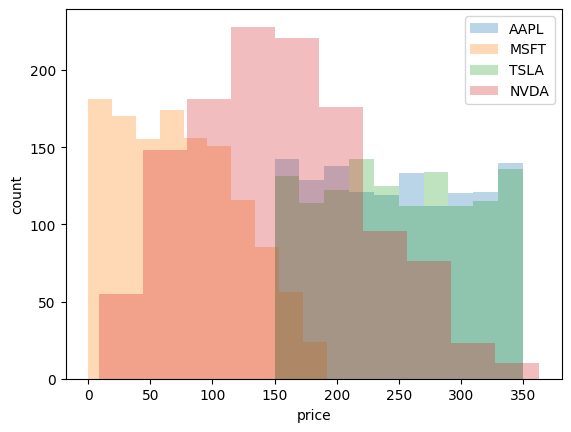

In [26]:
# TODO Plot prices over each multiline string
class StockPriceTrajectory:
    def __init__(self, stock_symbol: str) -> None:
        self.symbol = stock_symbol
        self.prices_over_lines = []


def interpret_string_as_prices(
    stock_symbol: str, buy_sell_string: str
) -> list[float]:
    prices = []
    for each_line in buy_sell_string.split("\n"):
        if each_line.count(stock_symbol) > 0:
            prices.append(float(each_line.split()[-1].strip(".$")))
    return prices


aapl_price_list_list = []
msft_price_list_list = []
tsla_price_list_list = []
nvda_price_list_list = []

for each_string in to_bot_strings_list:
    aapl_price_list_list.append(interpret_string_as_prices("AAPL", each_string))
    msft_price_list_list.append(interpret_string_as_prices("MSFT", each_string))
    tsla_price_list_list.append(interpret_string_as_prices("TSLA", each_string))
    nvda_price_list_list.append(interpret_string_as_prices("NVDA", each_string))

plt.figure()
aapl_hist = []
msft_hist = []
tsla_hist = []
nvda_hist = []
for each_prices in aapl_price_list_list:  # or zip and do each (less overlap)
    for price in each_prices:
        aapl_hist.append(price)
for each_prices in msft_price_list_list:
    for price in each_prices:
        msft_hist.append(price)
for each_prices in tsla_price_list_list:
    for price in each_prices:
        tsla_hist.append(price)
for each_prices in nvda_price_list_list:
    for price in each_prices:
        nvda_hist.append(price)
plt.hist(aapl_hist, label="AAPL", alpha=0.3)
plt.hist(msft_hist, label="MSFT", alpha=0.3)
plt.hist(tsla_hist, label="TSLA", alpha=0.3)
plt.hist(nvda_hist, label="NVDA", alpha=0.3)
plt.xticks(list(range(0, 400, 50)))
plt.ylabel("count")
plt.xlabel("price")
plt.legend()
plt.show()

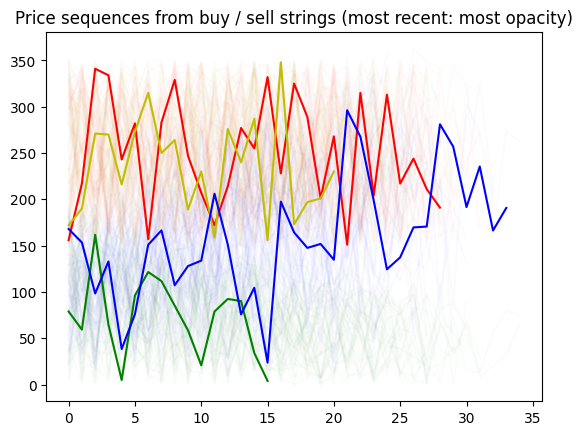

In [27]:
plt.figure()
plt.title("Price sequences from buy / sell strings (most recent: most opacity)")
for each_prices in aapl_price_list_list:  # or zip and do each (less overlap)
    plt.plot(each_prices, color="r", alpha=0.02, label="AAPL")
for each_prices in msft_price_list_list:
    plt.plot(each_prices, color="g", alpha=0.02, label="MSFT")
for each_prices in tsla_price_list_list:
    plt.plot(each_prices, color="y", alpha=0.02, label="TSLA")
for each_prices in nvda_price_list_list:
    plt.plot(each_prices, color="b", alpha=0.02, label="NVDA")
plt.plot(aapl_price_list_list[-1], color="r", alpha=1, label="AAPL")
plt.plot(msft_price_list_list[-1], color="g", alpha=1, label="MSFT")
plt.plot(tsla_price_list_list[-1], color="y", alpha=1, label="TSLA")
plt.plot(nvda_price_list_list[-1], color="b", alpha=1, label="NVDA")
plt.show()